In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글폰트 설정
from matplotlib import rc
from matplotlib import font_manager
f_path = "C:/windows/Fonts/malgun.ttf"
font_manager.FontProperties(fname=f_path).get_name()
rc('font', family='Malgun Gothic')

In [42]:
data = pd.read_csv('./data/train.csv')
data.head()

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,TRAIN_00003,14400000,36 months,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,TRAIN_00004,18000000,60 months,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B


### 할 일
* 범주형 변수 unique value 확인해보기 -> 각각이 대출등급에 미치는 영향을 살펴볼 것
* 수치형 변수와 대출등급 사이의 관계 확인
* 독립 변수 간의 관계 정립
* 변수 전처리 및 파생변수 생성
* 예측 모델 알고리즘 선정, 모델 구조 기획

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96294 entries, 0 to 96293
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            96294 non-null  object 
 1   대출금액          96294 non-null  int64  
 2   대출기간          96294 non-null  object 
 3   근로기간          96294 non-null  object 
 4   주택소유상태        96294 non-null  object 
 5   연간소득          96294 non-null  int64  
 6   부채_대비_소득_비율   96294 non-null  float64
 7   총계좌수          96294 non-null  int64  
 8   대출목적          96294 non-null  object 
 9   최근_2년간_연체_횟수  96294 non-null  int64  
 10  총상환원금         96294 non-null  int64  
 11  총상환이자         96294 non-null  float64
 12  총연체금액         96294 non-null  float64
 13  연체계좌수         96294 non-null  float64
 14  대출등급          96294 non-null  object 
dtypes: float64(4), int64(5), object(6)
memory usage: 11.0+ MB


In [46]:
target_count = data['대출등급'].value_counts().reset_index().sort_values('대출등급', ignore_index=True)
total = sum(target_count['count'])
target_count['비율'] = target_count['count']/total * 100
target_count

,대출등급,count,비율
0,A,16772,17.417492
1,B,28817,29.926060
2,C,27623,28.686107
3,D,13354,13.867946
4,E,7354,7.637028
5,F,1954,2.029202
6,G,420,0.436164


* D, E, F, G 등급에서 범주 불균형이 강하게 나타나는 것을 알 수 있음
* 딱 드는 생각이 등급이 낮은 부분을 나눠서 모델을 만들던지, 학습 데이터 증강이 필요할 것으로 보임

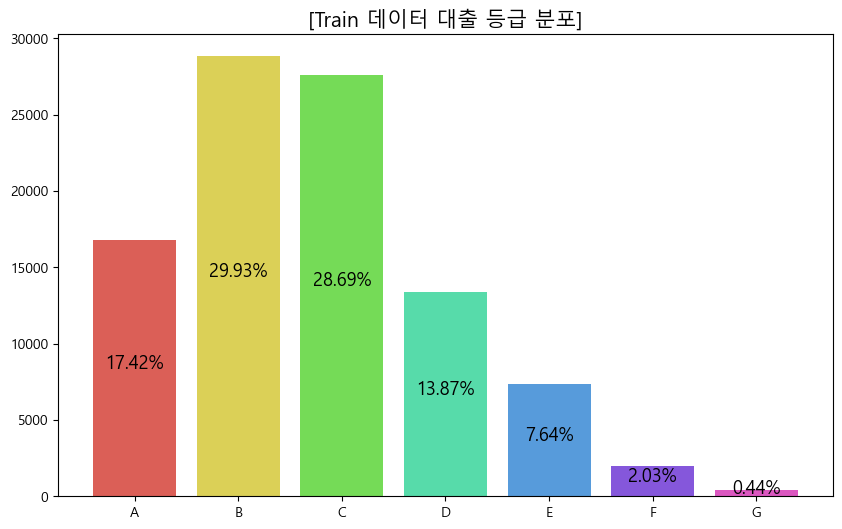

In [47]:
fig, ax = plt.subplots(figsize= (10,6))

count = target_count['대출등급']
label = target_count['count']
colors = sns.color_palette('hls',len(target_count))

plot_title = plt.title('[Train 데이터 대출 등급 분포]', fontsize=15)
bar_chart = plt.bar(count, label, color=colors)

for i, b in enumerate(bar_chart):
    ax.text(b.get_x() + b.get_width()*(1/2), b.get_height()*(1/2), str(round(target_count['비율'][i], 2)) + '%',ha='center',fontsize=13)


plt.show()

* 범주형 칼럼들에 대한 분석을 먼저 진행하고자 함